# Project : Advanced House Price Prediction 

## Model Selection 

__Models Used__

1) Linear Regression 


2) Ridge Regression


3) Decison Tree Regressor


4) Random Forest Regressor


5) SVM Regressor


6) KNN Regressor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv('/Users/amit/Documents/Data Science/Machine Lerning and Data science/EDA Pratice/Advance House Price Prediction/df_final.csv')
df.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,"('LotFrontage', 'na')","('MasVnrArea', 'na')","('GarageYrBlt', 'na')"
0,1,12.247694,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.036765,0.098361,0.0,0.0,1.0,1.0,0.50,0.12250,0.666667,1.0,1.00,0.75,0.75,0.25,1.000000,0.125089,0.833333,0.0,0.064212,0.140098,1.0,1.00,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.2,0.8,0.046729,0.666667,0.50,0.386460,0.666667,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.50,0.666667,0.75,0.0,0.0,0.0
1,2,12.109011,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.50,0.0,0.500000,0.2,1.0,0.75,0.6,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.4,0.3,0.25,0.00000,0.333333,1.0,0.50,0.75,0.75,1.00,0.666667,0.173281,0.833333,0.0,0.121575,0.206547,1.0,1.00,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.6,0.8,0.289720,0.666667,0.50,0.324401,0.666667,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0
2,3,12.317167,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.051471,0.114754,0.0,0.0,1.0,1.0,0.50,0.10125,0.666667,1.0,1.00,0.75,0.75,0.50,1.000000,0.086109,0.833333,0.0,0.185788,0.150573,1.0,1.00,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,0.8,0.065421,0.666667,0.50,0.428773,0.666667,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.727273,0.50,0.666667,0.75,0.0,0.0,0.0
3,4,11.849398,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.727273,0.4,1.0,0.75,1.0,0.666667,0.500,0.669118,0.606557,0.0,0.0,0.2,0.4,0.25,0.00000,0.333333,1.0,0.25,0.50,1.00,0.25,0.666667,0.038271,0.833333,0.0,0.231164,0.123732,1.0,0.75,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.4,0.074766,0.333333,0.75,0.452750,0.666667,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.00,0.666667,0.00,0.0,0.0,0.0
4,5,12.429216,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,1.000000,0.4,1.0,0.75,1.0,0.777778,0.500,0.058824,0.147541,0.0,0.0,1.0,1.0,0.50,0.21875,0.666667,1.0,1.00,0.75,0.75,0.75,1.000000,0.116052,0.833333,0.0,0.209760,0.187398,1.0,1.00,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,0.8,0.074766,0.666667,0.75,0.589563,0.666667,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.50,0.666667,0.75,0.0,0.0,0.0


In [3]:
df.shape

(1460, 84)

__Selected features from feature engineering__ 

In [4]:
selected_features = ['MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LotConfig',
       'Neighborhood', 'OverallQual', 'OverallCond', 'YearRemodAdd',
       'RoofStyle', 'Exterior1st', 'ExterQual', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'HeatingQC', 'CentralAir', '1stFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenQual', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'SaleCondition']

In [5]:
len(selected_features)

33

In [6]:
df=pd.concat([df[selected_features] , df['SalePrice']] , axis=1)

In [7]:
df.head()

,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,ExterQual,Foundation,BsmtQual,BsmtExposure,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageCond,PavedDrive,WoodDeckSF,SaleCondition,SalePrice
0,0.235294,0.75,0.366344,0.000000,0.00,0.636364,0.666667,0.500,0.098361,0.0,1.0,0.666667,1.00,0.75,0.25,1.00,1.0,0.356155,0.577712,0.333333,0.666667,0.5,0.666667,1.0,0.000000,0.2,0.8,0.666667,0.50,1.0,1.0,0.000000,0.75,12.247694
1,0.000000,0.75,0.391317,0.000000,0.50,0.500000,0.555556,0.875,0.524590,0.0,0.4,0.333333,0.50,0.75,1.00,1.00,1.0,0.503056,0.470245,0.000000,0.666667,0.0,0.333333,1.0,0.333333,0.6,0.8,0.666667,0.50,1.0,1.0,0.347725,0.75,12.109011
2,0.235294,0.75,0.422359,0.333333,0.00,0.636364,0.666667,0.500,0.114754,0.0,1.0,0.666667,1.00,0.75,0.50,1.00,1.0,0.383441,0.593095,0.333333,0.666667,0.5,0.666667,1.0,0.333333,0.6,0.8,0.666667,0.50,1.0,1.0,0.000000,0.75,12.317167
3,0.294118,0.75,0.390295,0.333333,0.25,0.727273,0.666667,0.500,0.606557,0.0,0.2,0.333333,0.25,0.50,0.25,0.75,1.0,0.399941,0.579157,0.333333,0.333333,0.0,0.666667,1.0,0.333333,0.8,0.4,0.333333,0.75,1.0,1.0,0.000000,0.00,11.849398
4,0.235294,0.75,0.468761,0.333333,0.50,1.000000,0.777778,0.500,0.147541,0.0,1.0,0.666667,1.00,0.75,0.75,1.00,1.0,0.466237,0.666523,0.333333,0.666667,0.5,0.666667,1.0,0.333333,0.6,0.8,0.666667,0.75,1.0,1.0,0.224037,0.75,12.429216


In [8]:
df.shape

(1460, 34)

## Train Test Split

In [9]:
X = df.drop('SalePrice', axis=1)
X.shape

(1460, 33)

In [10]:
y = df['SalePrice']
y.shape

(1460,)

In [11]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split( X , y , test_size=0.2 , random_state=2)

In [12]:
X_train.shape , y_train.shape

((1168, 33), (1168,))

In [13]:
X_test.shape , y_test.shape

((292, 33), (292,))

## 1) Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression
model_linear = LinearRegression().fit(X_train , y_train)   
# as most of the hyperparameter is Boolean in nature so not doing Ranodmised Search CV

In [15]:
train_predictions=model_linear.predict(X_train)

In [16]:
test_predictions=model_linear.predict(X_test)

__Bias and Variance__

In [17]:
from sklearn import metrics
rmse_of_train=metrics.mean_squared_error(y_train , train_predictions , squared=False)
rmse_of_train

0.12584176165634584

In [18]:
rmse_of_test=metrics.mean_squared_error(y_test , test_predictions , squared=False)
rmse_of_test

0.11935170495035873

__RMSE scores__ of both the train and test predictions 

So the model is __Generalized__

- It has good accuracy of both the train and test predictions 

In [19]:
from sklearn.model_selection import cross_val_score
model_linear_cv=cross_val_score(model_linear , X , y , scoring='neg_mean_squared_error' , cv=10)

model_linear_cv

array([-0.01354934, -0.01081271, -0.01326958, -0.02196866, -0.02059038,
       -0.0123189 , -0.01651011, -0.01226205, -0.02535863, -0.01699518])

In [20]:
model_linear_cv.mean()   

-0.016363552154545772

__Overall 'neg Mean Squared Error'__ of the model Linear Regression 

- The more close it is to the zero the best is model 

__R-Squared and Adj R-Squared__

Total Sum of Squares (tss)  - The proportion of variation captured by the model 

Resdidual Sum of Squares (rss)  - The variation that is not explained by the model 

R-Squared = 1 - rss/tss

So R-squared value gives us the variation in the target variable given by the variation in independent variables

In [21]:
def r_squared(predicted_values):
    mean_value= np.mean(y_train)
    tss = ((y_train - mean_value)**2).sum()
    print('TSS: ' , tss)
    
    rss = ((y_train - predicted_values)**2).sum()
    print('RSS: ' , rss)
    
    R_squared = 1 - (rss/tss)
    return R_squared

R_squared=r_squared(train_predictions)
print(R_squared)

TSS:  183.55867448588663
RSS:  18.496622004870343
0.8992331903862572


In [22]:
def adjusted_r_squared(R_squared):
    adj_R_squared = 1 - ((1-(R_squared**2)) * (1168-1) / (1168 - 33 - 1))
    return adj_R_squared

adjusted_r_squared(R_squared)

0.8030510810563067

So when their are multiple variables in the model then adj R-squared is used 

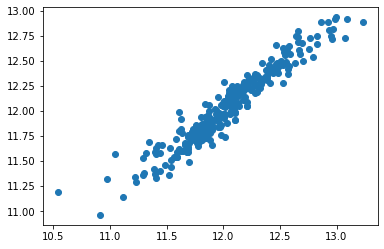

In [23]:
plt.scatter(y_test , test_predictions)
plt.show()

__Scatter Plot -__ The plot is linear in nature not distriubted so the model is good 

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

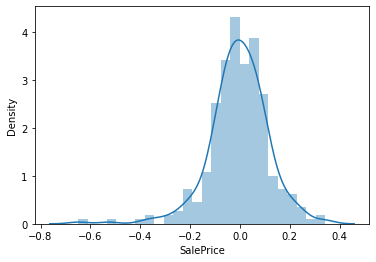

In [24]:
sns.distplot(y_test-test_predictions)

__DistPlot -__ The above distribution plot is show the distributions of the errror 

So we can see the error are very much almost close to the actual values 

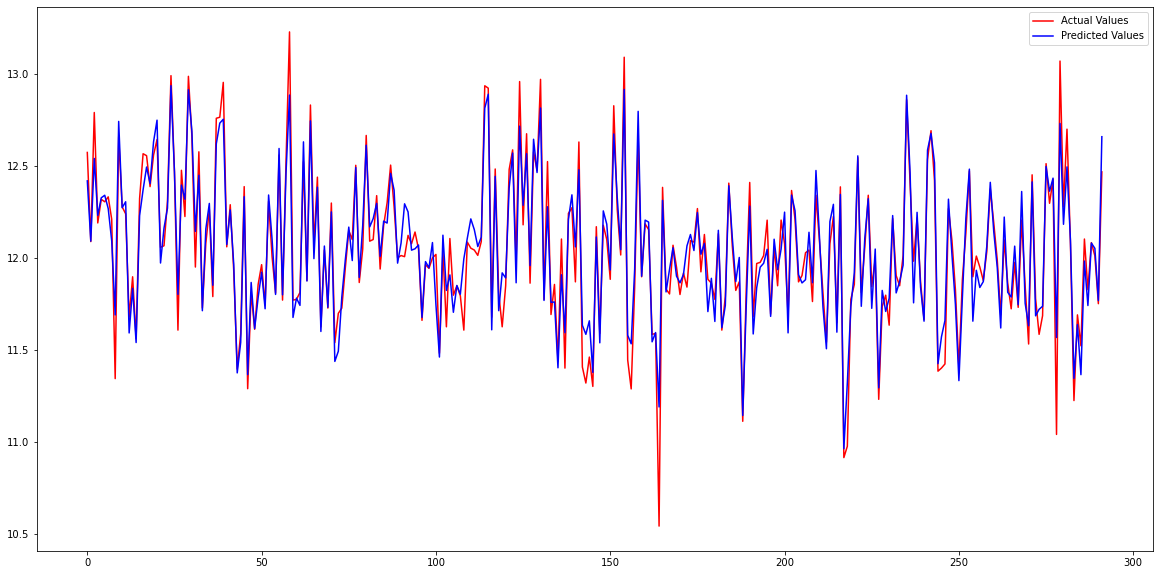

In [25]:
plt.figure(figsize=(20,10))
plt.plot( list(y_test) , label ='Actual Values' , color='Red')
plt.plot( test_predictions , label ='Predicted Values' , color='Blue')
plt.legend()
plt.show()

In the above plot we can very well see the status of both the actual values and the predicted values

## 2) Ridge Regression 

In [26]:
from sklearn.linear_model import Ridge
model_ridge=Ridge()

__HyperParameter Optimisation__

In [27]:
alpha=[ i for i in np.arange(0.1 , 10 , 0.1)]
max_iter=[i for i in np.arange(500 , 40000 , 500)]
solver=['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
tol=[ i for i in np.arange(0.000 , 2 , 0.001)]

random_grid={
    'alpha':alpha,
    'max_iter':max_iter,
    'solver':solver,
    'tol':tol
}



randomised_search_ridge=RandomizedSearchCV(estimator=model_ridge , param_distributions=random_grid , n_iter=500,
                                          scoring='neg_mean_squared_error' , n_jobs=-1 , cv=10 , verbose=2 , 
                                          random_state=2).fit(X_train,y_train)

Fitting 10 folds for each of 500 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 1616 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 4981 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:    5.8s finished


Selected Parameters based on our data and the model

In [28]:
randomised_search_ridge.best_params_

{'tol': 1.224, 'solver': 'cholesky', 'max_iter': 39000, 'alpha': 0.8}

In [29]:
randomised_search_ridge.best_score_   # neg mean squared error

-0.017650511718032315

In [30]:
model_ridge=Ridge(tol= 1.224, solver='cholesky', max_iter= 39000, alpha= 0.8 , random_state=2).fit(X_train , y_train)

In [31]:
train_predictions_ridge=model_ridge.predict(X_train)

In [32]:
test_predictions_ridge=model_ridge.predict(X_test)

In [33]:
def allModelEvaluations_and_Merics(model , train_predictions , test_predictions):
    
    rmse_of_train=metrics.mean_squared_error(y_train , train_predictions , squared=False)
    print('RMSE of train' , rmse_of_train)
    
    
    rmse_of_test=metrics.mean_squared_error(y_test , test_predictions , squared=False)
    print('RMSE of test' , rmse_of_test)
    
    print()
    print()
    model_cv=cross_val_score(model , X , y , scoring='neg_mean_squared_error' , cv=10)
    print('Validated values are : ' , model_cv)
    print('Overall neg Mean Squared Error: ' , model_cv.mean())
    
    print()
    print()
    R_squared=r_squared(train_predictions)
    print('R-Squared: ' , R_squared)
    
    adj_r_squared=adjusted_r_squared(R_squared)
    print('adj R-Squared: ',adj_r_squared)

In [34]:
allModelEvaluations_and_Merics(model_ridge , train_predictions_ridge , test_predictions_ridge)

RMSE of train 0.12607105992688503
RMSE of test 0.12057302232001256


Validated values are :  [-0.01349363 -0.01100482 -0.01346673 -0.02214017 -0.02099276 -0.01223709
 -0.01629318 -0.01217315 -0.02492098 -0.01711394]
Overall neg Mean Squared Error:  -0.016383643726074752


TSS:  183.55867448588663
RSS:  18.56408939247106
R-Squared:  0.8988656382245863
adj R-Squared:  0.8023709535475326


### Conclusion:

__Bias and Variance:__

Both the train and test data has RMSE error so both have the good accuray 

so the model is __Generalized__ 

Has __low Variance__ and __low Bias__


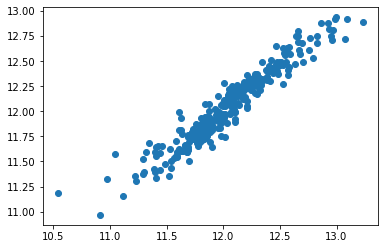

In [35]:
plt.scatter(list(y_test) , test_predictions_ridge)
plt.show()

__Scatter Plot -__ The plot is linear in nature not distriubted so the model is good 

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

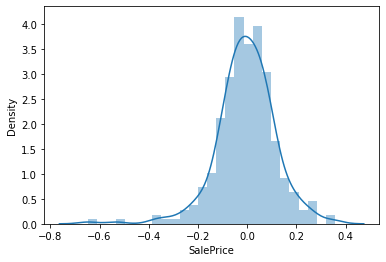

In [36]:
sns.distplot(y_test-test_predictions_ridge)

__DistPlot -__ The above distribution plot is show the distributions of the errror 

So we can see the error are very much almost close to the actual values

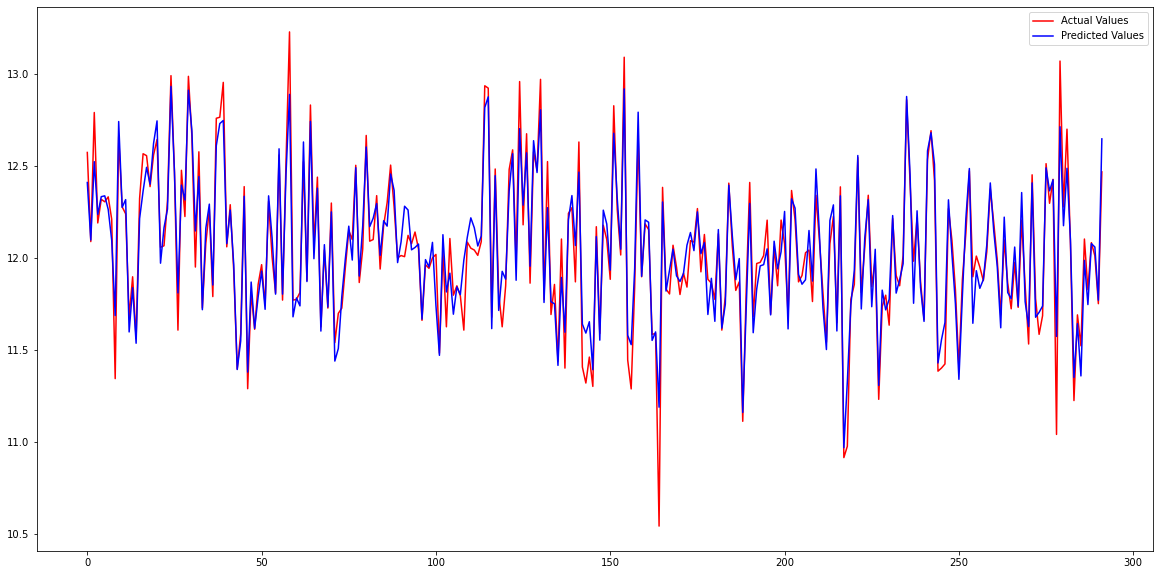

In [37]:
plt.figure(figsize=(20,10))
plt.plot(list(y_test) , label ='Actual Values' , color='Red')
plt.plot(test_predictions_ridge , label ='Predicted Values' , color='Blue')
plt.legend()
plt.show()

In the above plot we can very well see the status of both the actual values and the predicted values

## 3) Decision Trees

In [38]:
from sklearn.tree import DecisionTreeRegressor
model_decision_tree=DecisionTreeRegressor()

__HyperParameter Optimisation__

In [39]:
splitter=['best', 'random']
max_depth=[i for i in np.arange(0 , 50 , 2)]
min_samples_split=[i for i in np.arange(0 , 10 , 1)]
min_samples_leaf=[i for i in np.arange(0 , 10 , 1)]
max_features=['auto', 'sqrt', 'log2']
max_leaf_nodes=[i for i in np.arange(0 , 10 , 1)]

random_grid={
    'splitter':splitter,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'max_features':max_features,
    'max_leaf_nodes':max_leaf_nodes
    
    
}



randomised_search_decision_tree=RandomizedSearchCV(estimator=model_decision_tree , param_distributions=random_grid , n_iter=500,
                                          scoring='neg_mean_squared_error' , n_jobs=-1 , cv=10 , verbose=2 , 
                                          random_state=2).fit(X_train,y_train)

Fitting 10 folds for each of 500 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 4149 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:    3.2s finished


In [40]:
randomised_search_decision_tree.best_params_

{'splitter': 'best',
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_leaf_nodes': 9,
 'max_features': 'auto',
 'max_depth': 20}

In [41]:
randomised_search_decision_tree.best_score_

-0.04901847763457816

In [42]:
model_decision_tree_1st=DecisionTreeRegressor(splitter= 'best',
 min_samples_split= 2,
 min_samples_leaf= 4,
 max_leaf_nodes= 9,
 max_features='auto',
 max_depth=20 , random_state=2).fit(X_train , y_train)

In [43]:
train_predictions_decision_tree=model_decision_tree_1st.predict(X_train)

In [44]:
test_predictions_decision_tree=model_decision_tree_1st.predict(X_test)

In [45]:
allModelEvaluations_and_Merics(model_decision_tree_1st ,train_predictions_decision_tree, test_predictions_decision_tree)

RMSE of train 0.2063341587896935
RMSE of test 0.2173878093705369


Validated values are :  [-0.04118948 -0.03760833 -0.04355915 -0.05375066 -0.0597117  -0.03533579
 -0.04619746 -0.03957468 -0.04623714 -0.05340939]
Overall neg Mean Squared Error:  -0.04565737902637201


TSS:  183.55867448588663
RSS:  49.72618097747012
R-Squared:  0.7290992587697431
adj R-Squared:  0.5179546260182832


__Conclusion:__

__Bias and Variance__

The model RMSE scores of both the train and test data is good 

like the model looks to be balanced has low bias and low variance but

the error scores should more like to be close to zero if possible 

__R-Squared and adj R-Squared__

We are seeing that the model is a good fit as the 

independent variables are capturing details to predict the dependent variables 

But when we see the adj R-Squared is kind of low as compared to the R-Squared showing that the some features 

can be improved if possible 

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

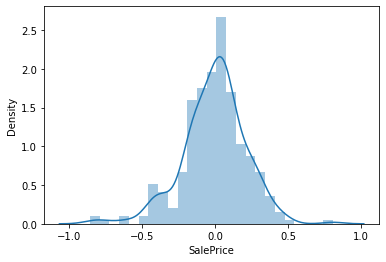

In [46]:
sns.distplot(y_test-test_predictions_decision_tree)

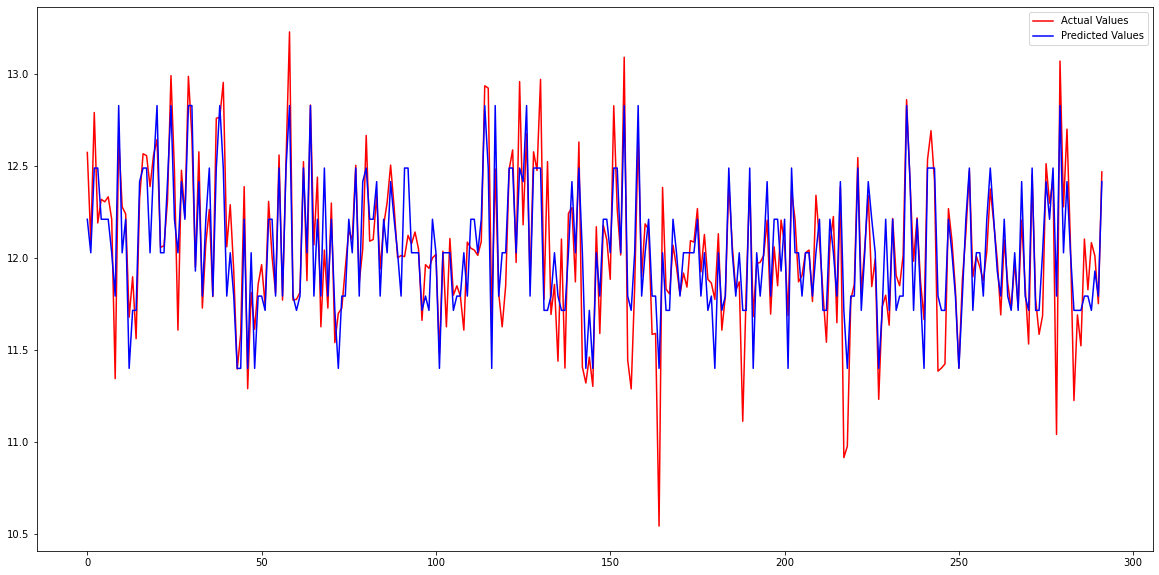

In [47]:
plt.figure(figsize=(20,10))
plt.plot(list(y_test) , label ='Actual Values' , color='Red')
plt.plot(test_predictions_decision_tree , label ='Predicted Values' , color='Blue')
plt.legend()
plt.show()

__By default parameters__

In [48]:
model_decision_tree_2nd=DecisionTreeRegressor(random_state=2).fit(X_train , y_train)
train_pred=model_decision_tree_2nd.predict(X_train)
test_pred = model_decision_tree_2nd.predict(X_test)

In [49]:
allModelEvaluations_and_Merics(model_decision_tree_2nd , train_pred , test_pred)

RMSE of train 0.0011607858989956502
RMSE of test 0.1786611216658653


Validated values are :  [-0.02949684 -0.03477371 -0.05998234 -0.05068999 -0.04422542 -0.03158907
 -0.04009957 -0.0299417  -0.03557128 -0.04942355]
Overall neg Mean Squared Error:  -0.04057934765205311


TSS:  183.55867448588663
RSS:  0.0015737911190627394
R-Squared:  0.999991426223122
adj R-Squared:  0.9999823535190057


__Conclusion:__

The default parameters of the model Decision Tree is giving better fit and accuracy so 
Going by the default parameters

Just a model is little bit overfit(just a bit high variance)

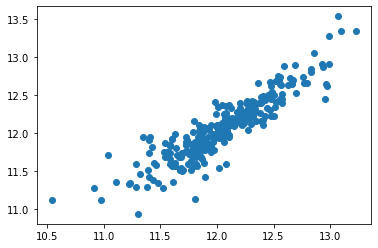

In [50]:
plt.scatter(list(y_test) , test_pred)
plt.show()

__Scatter Plot -__ The plot is linear in nature not distriubted so the model is good 

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

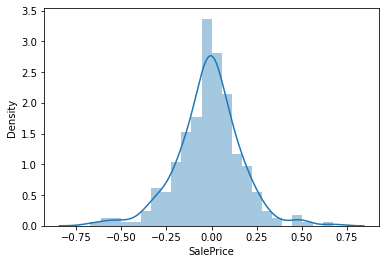

In [51]:
sns.distplot(y_test-test_pred)

__DistPlot -__ The above distribution plot is show the distributions of the errror 

So we can see the error are very much almost close to the 0

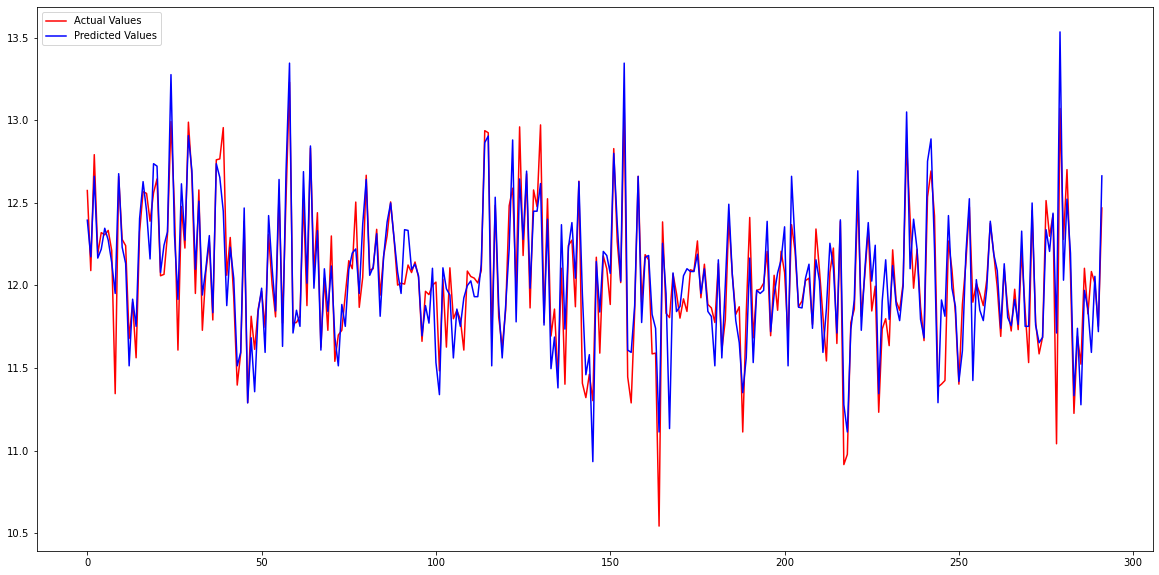

In [52]:
plt.figure(figsize=(20,10))
plt.plot(list(y_test) , label ='Actual Values' , color='Red')
plt.plot(test_pred , label ='Predicted Values' , color='Blue')
plt.legend()
plt.show()

In the above plot we can very well see the status of both the actual values and the predicted values

__So we can see the model is kinda overfit a little bit__ (Due to default parameters)

### Note --> 

We have 2 model in of the decision tree so we are taking consideration of the 2nd model as it is 
more accuracate and giving better scores

## 4) Random Forest 

In [53]:
from sklearn.ensemble import RandomForestRegressor
model_random_forest=RandomForestRegressor()

__HyperParameter Optimisation__

In [54]:
n_estimators=[i for i in np.arange(0 , 2000 , 100)]
max_depth=[i for i in np.arange(0 , 50 , 2)]
min_samples_split=[i for i in np.arange(0 , 20 , 1)]
min_samples_leaf=[i for i in np.arange(0 , 20 , 1)]
max_features=['auto', 'sqrt', 'log2']
max_leaf_nodes=[i for i in np.arange(0 , 10 , 1)]

random_grid={
    'n_estimators':n_estimators,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'max_features':max_features,
    'max_leaf_nodes':max_leaf_nodes
    
}



randomised_search_random_forest=RandomizedSearchCV(estimator=model_random_forest , param_distributions=random_grid , n_iter=100,
                                          scoring='neg_mean_squared_error' , n_jobs=-1 , cv=10 , verbose=2 , 
                                          random_state=2).fit(X_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 162 tasks      | elapsed:   46.3s
[Parallel(n_jobs=-1)]: Done 365 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 648 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  3.5min finished


In [55]:
randomised_search_random_forest.best_params_

{'n_estimators': 1900,
 'min_samples_split': 16,
 'min_samples_leaf': 2,
 'max_leaf_nodes': 9,
 'max_features': 'log2',
 'max_depth': 34}

In [56]:
randomised_search_random_forest.best_score_

-0.033661385027568505

In [57]:
model_random_forest=RandomForestRegressor(n_estimators= 200,
 min_samples_split= 7,
 min_samples_leaf= 10,
 max_leaf_nodes= 9,
 max_features= 'sqrt',
 max_depth= 36,random_state=2).fit(X_train , y_train)

In [58]:
train_predict_random_forest = model_random_forest.predict(X_train)

In [59]:
test_predict_random_forest = model_random_forest.predict(X_test)

In [60]:
allModelEvaluations_and_Merics(model_random_forest , train_predict_random_forest , test_predict_random_forest)

RMSE of train 0.17398276843467173
RMSE of test 0.18621179814921665


Validated values are :  [-0.02717835 -0.02783589 -0.03483291 -0.04138928 -0.04808053 -0.02608141
 -0.03488994 -0.02639356 -0.0308696  -0.03555178]
Overall neg Mean Squared Error:  -0.033310324548913556


TSS:  183.55867448588663
RSS:  35.35536433584096
R-Squared:  0.8073893024404066
adj R-Squared:  0.6417469363371304


__Conclusion:__

__Bias and Variance__

So the model is very well generalized as it is giving good RMSE scores of both the test and train data

that mean low variance and low bias 

__R-Squared and Adj R-Squared__

The R-Squared of the model is very well and the adj R-Squared of the model is also good its a bit less then R-Squared

but overall its good for this such a complex model having so many predictors to find the final target variable 

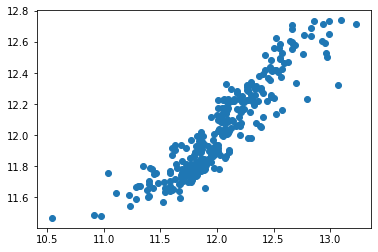

In [61]:
plt.scatter(list(y_test) , test_predict_random_forest)
plt.show()

__Scatter Plot -__ The plot is linear in nature not distriubted so the model is good 

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

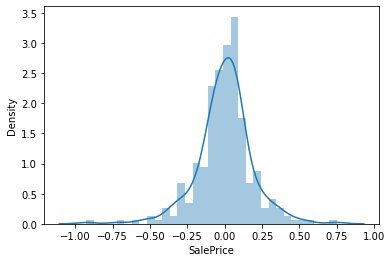

In [62]:
sns.distplot(y_test-test_predict_random_forest)

__DistPlot -__ The above distribution plot is show the distributions of the errror 

So we can see the error are very much almost close to the 0

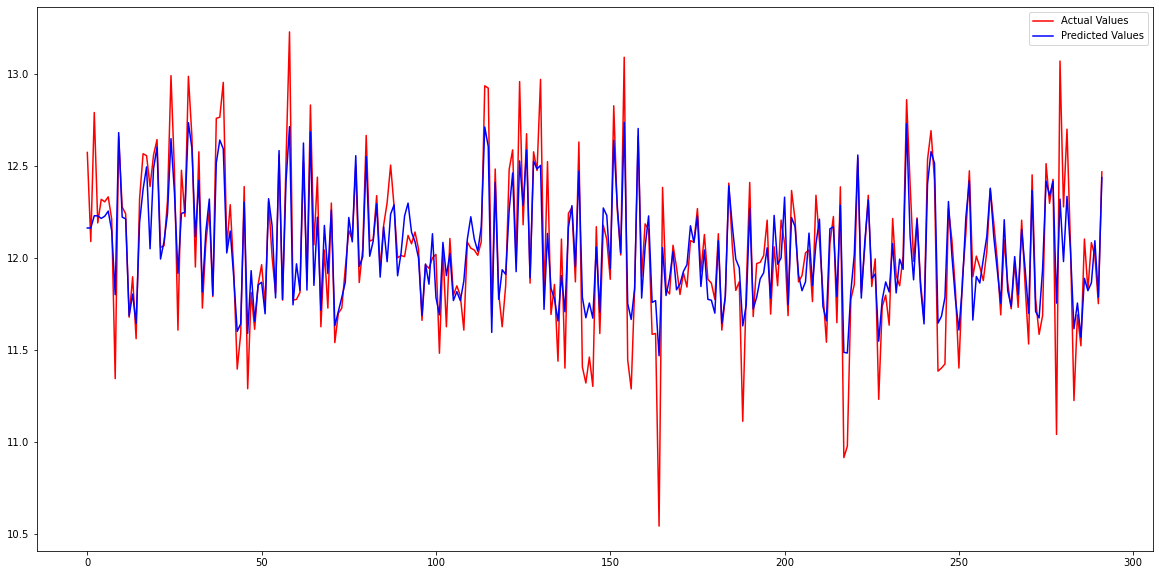

In [63]:
plt.figure(figsize=(20,10))
plt.plot(list(y_test) , label ='Actual Values' , color='Red')
plt.plot( test_predict_random_forest, label ='Predicted Values' , color='Blue')
plt.legend()
plt.show()

In the above plot we can very well see the status of both the actual values and the predicted values

## 5) SVM Regressor 

In [64]:
from sklearn.svm import SVR
model_svm_regressor=SVR()

__HyperParameter Optimisation__

In [78]:
kernel=['linear', 'poly', 'rbf', 'sigmoid']
degree=[i for i in np.arange(0 , 12 , 1)]
gamma=['scale', 'auto']
tol=[i for i in np.arange(0.000 , 2 , 0.001)]
C=[i for i in np.arange(0 , 10 , 1)]
epsilon=[i for i in np.arange(0.0 , 2 , 0.01)]
cache_size=[i for i in np.arange(0 , 1000 , 100)]
max_iter=[i for i in np.arange(-5 , 5 , 1)]

random_grid={
    'kernel':kernel,
    'degree':degree,
    'gamma':gamma,
    'tol':tol,
    'C':C,
    'epsilon':epsilon,
    'cache_size':cache_size,
    'max_iter':max_iter
    
}



randomised_search_svm_regressor=RandomizedSearchCV(estimator=model_svm_regressor , param_distributions=random_grid , n_iter=500,
                                          scoring='neg_mean_squared_error' , n_jobs=-1 , cv=10 , verbose=2 , 
                                          random_state=2).fit(X_train,y_train)

Fitting 10 folds for each of 500 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 4149 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:    2.9s finished


In [79]:
randomised_search_svm_regressor.best_params_

{'tol': 0.11,
 'max_iter': -1,
 'kernel': 'rbf',
 'gamma': 'scale',
 'epsilon': 0.13,
 'degree': 6,
 'cache_size': 500,
 'C': 3}

In [80]:
randomised_search_svm_regressor.best_score_

-0.02220139154026058

In [86]:
model_svm_regressor=SVR(tol =0.11,
 max_iter= -1,
 kernel= 'rbf',
 gamma= 'scale',
 epsilon= 0.13,
 degree= 6,
 cache_size= 500,
 C= 3).fit(X_train , y_train)

In [87]:
train_pred_svm_regressor = model_svm_regressor.predict(X_train)

In [88]:
test_pred_svm_regressor = model_svm_regressor.predict(X_test)

In [89]:
allModelEvaluations_and_Merics(model_svm_regressor , train_pred_svm_regressor , test_pred_svm_regressor)

RMSE of train 0.09883592092281665
RMSE of test 0.13522895288505107


Validated values are :  [-0.01636059 -0.01617461 -0.01958559 -0.02377632 -0.02491389 -0.01385341
 -0.01977892 -0.01526371 -0.0201821  -0.02220096]
Overall neg Mean Squared Error:  -0.019209010632461263


TSS:  183.55867448588663
RSS:  11.409653861124358
R-Squared:  0.9378419249698732
adj R-Squared:  0.876042244058031


__Conclusion:__

__Bias and Variance__

The model is giving the very good train accuracy and good test accuracy 

Its a bit overfit as the variance is little bit high


__R-Squared and adj R-Squared__

The model R-Squared is very very good along with the adj R-Squared is also good 

so the indepenedent variables is caputring a very good pattern to predict dependent variable or target variable 

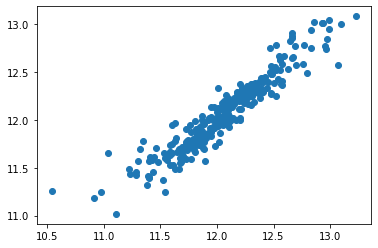

In [90]:
plt.scatter(list(y_test) , test_pred_svm_regressor)
plt.show()

__Scatter Plot -__ The plot is linear in nature not distriubted so the model is good 

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

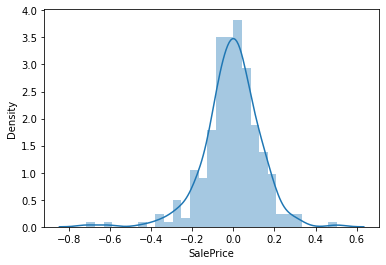

In [91]:
sns.distplot(y_test-test_pred_svm_regressor)

__DistPlot -__ The above distribution plot is show the distributions of the errror 

So we can see the error are very much almost close to the 0

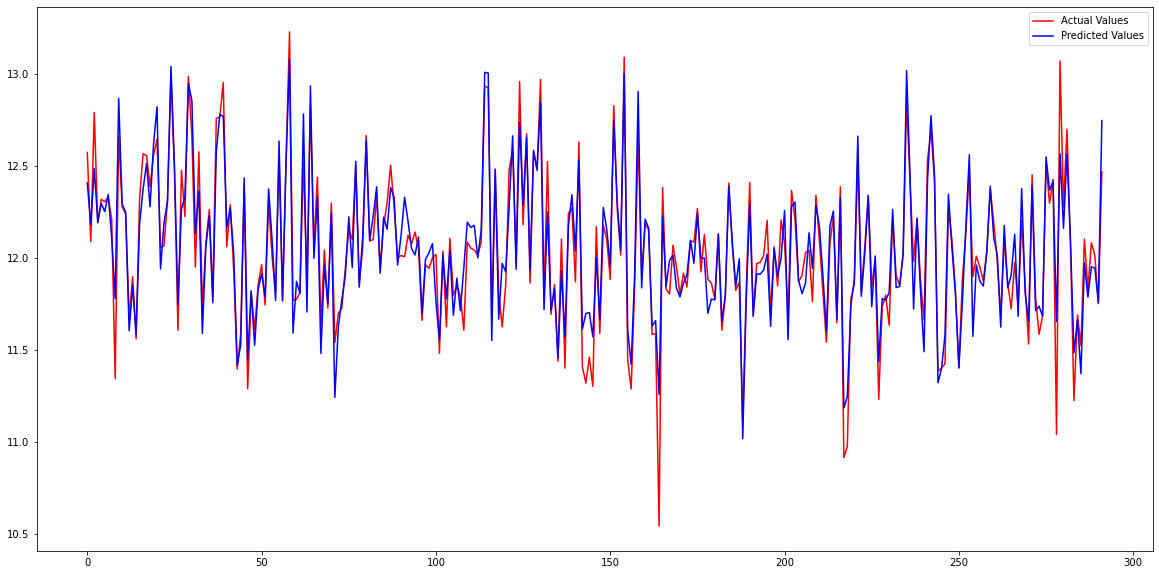

In [92]:
plt.figure(figsize=(20,10))
plt.plot(list(y_test) , label ='Actual Values' , color='Red')
plt.plot( test_pred_svm_regressor, label ='Predicted Values' , color='Blue')
plt.legend()
plt.show()

In the above plot we can very well see the status of both the actual values and the predicted values

## 6) KNN Regressor

In [93]:
from sklearn.neighbors import KNeighborsRegressor
model_knn=KNeighborsRegressor()

__HyperParameter Optimisation__

In [94]:
n_neighbors=[i for i in np.arange(1 , 20 , 2)]
weights=['uniform', 'distance']
algorithm=['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size=[i for i in np.arange(0 , 100 , 5)]
p=[i for i in np.arange(0 , 10 , 1)]



random_grid={
    'n_neighbors':n_neighbors,
    'weights':weights,
    'algorithm':algorithm,
    'leaf_size':leaf_size,
    'p':p    
    
}



randomised_search_knn_regressor=RandomizedSearchCV(estimator=model_knn , param_distributions=random_grid , n_iter=500,
                                          scoring='neg_mean_squared_error' , n_jobs=-1 , cv=10 , verbose=2 , 
                                          random_state=2).fit(X_train,y_train)

Fitting 10 folds for each of 500 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 1316 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 2640 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:   43.0s finished


In [95]:
randomised_search_knn_regressor.best_params_

{'weights': 'distance',
 'p': 1,
 'n_neighbors': 11,
 'leaf_size': 80,
 'algorithm': 'auto'}

In [96]:
randomised_search_knn_regressor.best_score_

-0.028215565511488377

In [100]:
model_knn=KNeighborsRegressor(weights= 'distance',
 p= 1,
 n_neighbors=11,
 leaf_size=80,
 algorithm='auto').fit(X_train , y_train)

In [104]:
train_pred_knn=model_knn.predict(X_train)

In [105]:
test_pred_knn=model_knn.predict(X_test)

In [106]:
allModelEvaluations_and_Merics(model_knn , train_pred_knn , test_pred_knn)

RMSE of train 0.001160499322224274
RMSE of test 0.16599812441808823


Validated values are :  [-0.01928849 -0.02473554 -0.02689306 -0.036041   -0.0348277  -0.02028885
 -0.02806967 -0.01936591 -0.03362653 -0.02741173]
Overall neg Mean Squared Error:  -0.027054846815747362


TSS:  183.55867448588663
RSS:  0.0015730141345993431
R-Squared:  0.9999914304560162
adj R-Squared:  0.9999823622310784


__Conclusion:__

__Bias and Variance__

The model is giving the good train and test RMSE scores so the model has log bias and variance 

__R-Squared and adj R-Squared__

The model is giving the high scores of both the R-Squared and adj R-Squared 

that means the model is capturing the model very well based on the independent variables and predicting 

the target variables

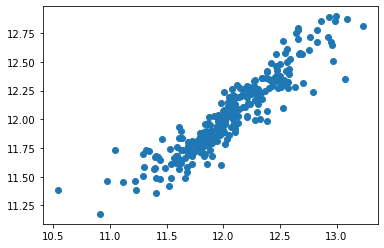

In [108]:
plt.scatter(list(y_test) , test_pred_knn)
plt.show()

__Scatter Plot:__
    
We can see the scatterness or spread of both the actual value and predicted values

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

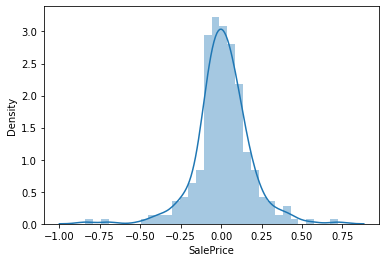

In [109]:
sns.distplot(y_test-test_pred_knn)

__Distribution/Dist Plot:__

The distiubtion of the error scores are shown above hence we can see

its very very less and almost close to zero 

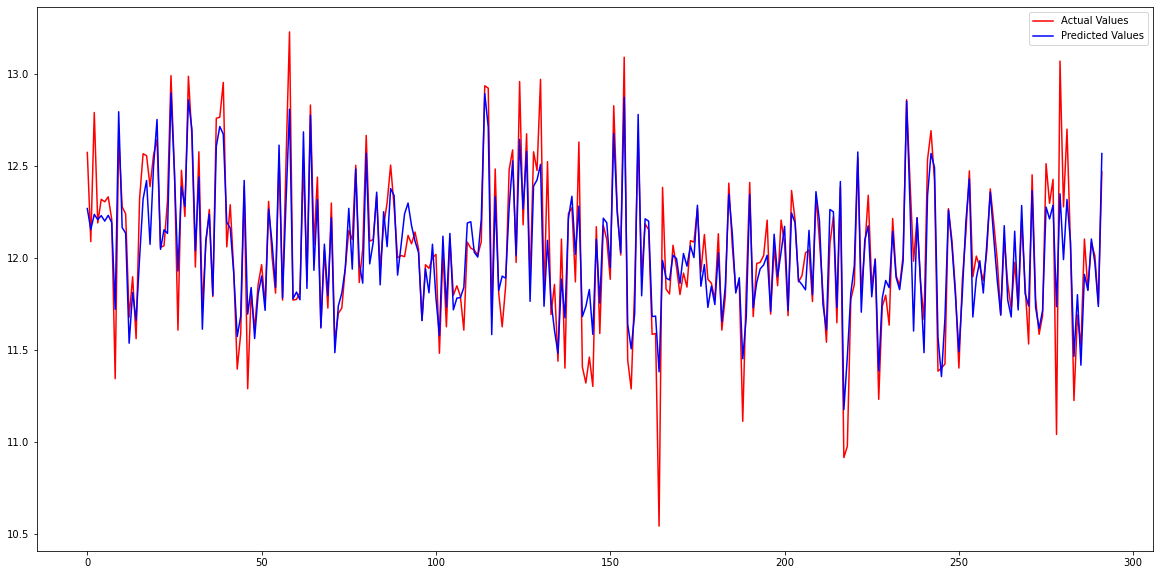

In [110]:
plt.figure(figsize=(20,10))
plt.plot(list(y_test) , label ='Actual Values' , color='Red')
plt.plot( test_pred_knn , label ='Predicted Values' , color='Blue')
plt.legend()
plt.show()

In the above plot we can very well see the status of both the actual values and the predicted values of the 

taget variable

# Final Selected Model 

__Linear Regression and Ridge Regression__ 

out of these two also the __Ridge Regression Model__ is very well balanced 

Note --> The results of the all the model is listed in the file attached to with the project 
__"Model_selection Results"__ 